In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import glob
from functools import reduce

## Analytics Base Table

[reduce()](https://docs.python.org/3/library/functools.html#functools.reduce "Documentation") Apply function of two arguments cumulatively to the items of iterable, from left to right, so as to reduce the iterable to a single value

[lambda](https://book.pythontips.com/en/latest/lambdas.html "Documentation") Lambdas are one line functions. They are also known as anonymous functions in some other languages. You might want to use lambdas when you don’t want to use a function twice in a program. They are just like normal functions and even behave like them.

[pandas.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html "Documentation") Merge DataFrame or named Series objects with a database-style join.



In [6]:
def merge_csv(path_address):
    """
    This function saves all file strings ending with 
    '.csv' in a directory to a variable all_files. The collection
    iterated through with each element being used as file name for 
    pd.read_csv() to generate a dataframe that is then appened to a list
    .The list of dataframes are outer merged one by one to form a dataframe
    created through the mutually exclusive information within each file
    
    
    Arguments:
    `path_address`: string
    
    Outputs:
    `df_merged`: Pandas Dataframe containing the mutally exlusive 
    numerical data from several data sources.
    """
    
    all_files = glob.glob(path_address + "/*.csv")
    data_frames = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        data_frames.append(df)
    
    df_merged = reduce(lambda  left,right: pd.merge\
                (left,right,how='outer'), data_frames)
    return df_merged


In [7]:
# Set path string to a variable
path = 'C:/Users/Hevander/Desktop/BigThinkFiles/csvdata'
# Call function and set to a variable
complaints_df = merge_csv(path)
complaints_df.head()

,UHF_42,Incident_Address_Borough,Date_Received,asbestos_count,dust_count,gasses_count,mold_count,sewageL_count,sewageO_count,ventilation_count
0,bayside - littleneck,Queens,2010,5.0,NaN,4.0,3.0,NaN,NaN,4.0
1,bayside - littleneck,Queens,2011,2.0,NaN,8.0,2.0,NaN,NaN,8.0
2,bayside - littleneck,Queens,2012,6.0,NaN,16.0,2.0,NaN,NaN,3.0
3,bayside - littleneck,Queens,2013,1.0,NaN,12.0,NaN,NaN,NaN,4.0
4,bayside - littleneck,Queens,2014,5.0,4.0,21.0,NaN,NaN,NaN,NaN


In [8]:
complaints_df.shape

(522, 10)

### Changing column headers and data types

In [9]:
complaints_df.dtypes

UHF_42                       object
Incident_Address_Borough     object
Date_Received                 int64
asbestos_count              float64
dust_count                  float64
gasses_count                float64
mold_count                  float64
sewageL_count               float64
sewageO_count               float64
ventilation_count           float64
dtype: object

In [10]:
complaints_df.rename(columns = {'Incident_Address_Borough':'Borough'}, inplace = True)
complaints_df.rename(columns = {'Date_Received':'Year'}, inplace = True)
complaints_df['Year'] = complaints_df['Year'].astype(str)

In [11]:
complaints_df.dtypes

UHF_42                object
Borough               object
Year                  object
asbestos_count       float64
dust_count           float64
gasses_count         float64
mold_count           float64
sewageL_count        float64
sewageO_count        float64
ventilation_count    float64
dtype: object

In [12]:
complaints_df.head(10)

,UHF_42,Borough,Year,asbestos_count,dust_count,gasses_count,mold_count,sewageL_count,sewageO_count,ventilation_count
0,bayside - littleneck,Queens,2010,5.0,NaN,4.0,3.0,NaN,NaN,4.0
1,bayside - littleneck,Queens,2011,2.0,NaN,8.0,2.0,NaN,NaN,8.0
2,bayside - littleneck,Queens,2012,6.0,NaN,16.0,2.0,NaN,NaN,3.0
3,bayside - littleneck,Queens,2013,1.0,NaN,12.0,NaN,NaN,NaN,4.0
4,bayside - littleneck,Queens,2014,5.0,4.0,21.0,NaN,NaN,NaN,NaN
5,bayside - littleneck,Queens,2015,4.0,1.0,22.0,3.0,NaN,NaN,6.0
6,bayside - littleneck,Queens,2016,9.0,1.0,15.0,5.0,NaN,NaN,4.0
7,bayside - littleneck,Queens,2017,6.0,1.0,13.0,5.0,NaN,4.0,13.0
8,bayside - littleneck,Queens,2018,3.0,1.0,11.0,6.0,NaN,3.0,4.0
9,bayside - littleneck,Queens,2019,2.0,1.0,7.0,4.0,2.0,6.0,2.0


## Data Quality Report
---
Continous and Catagorical Quality report

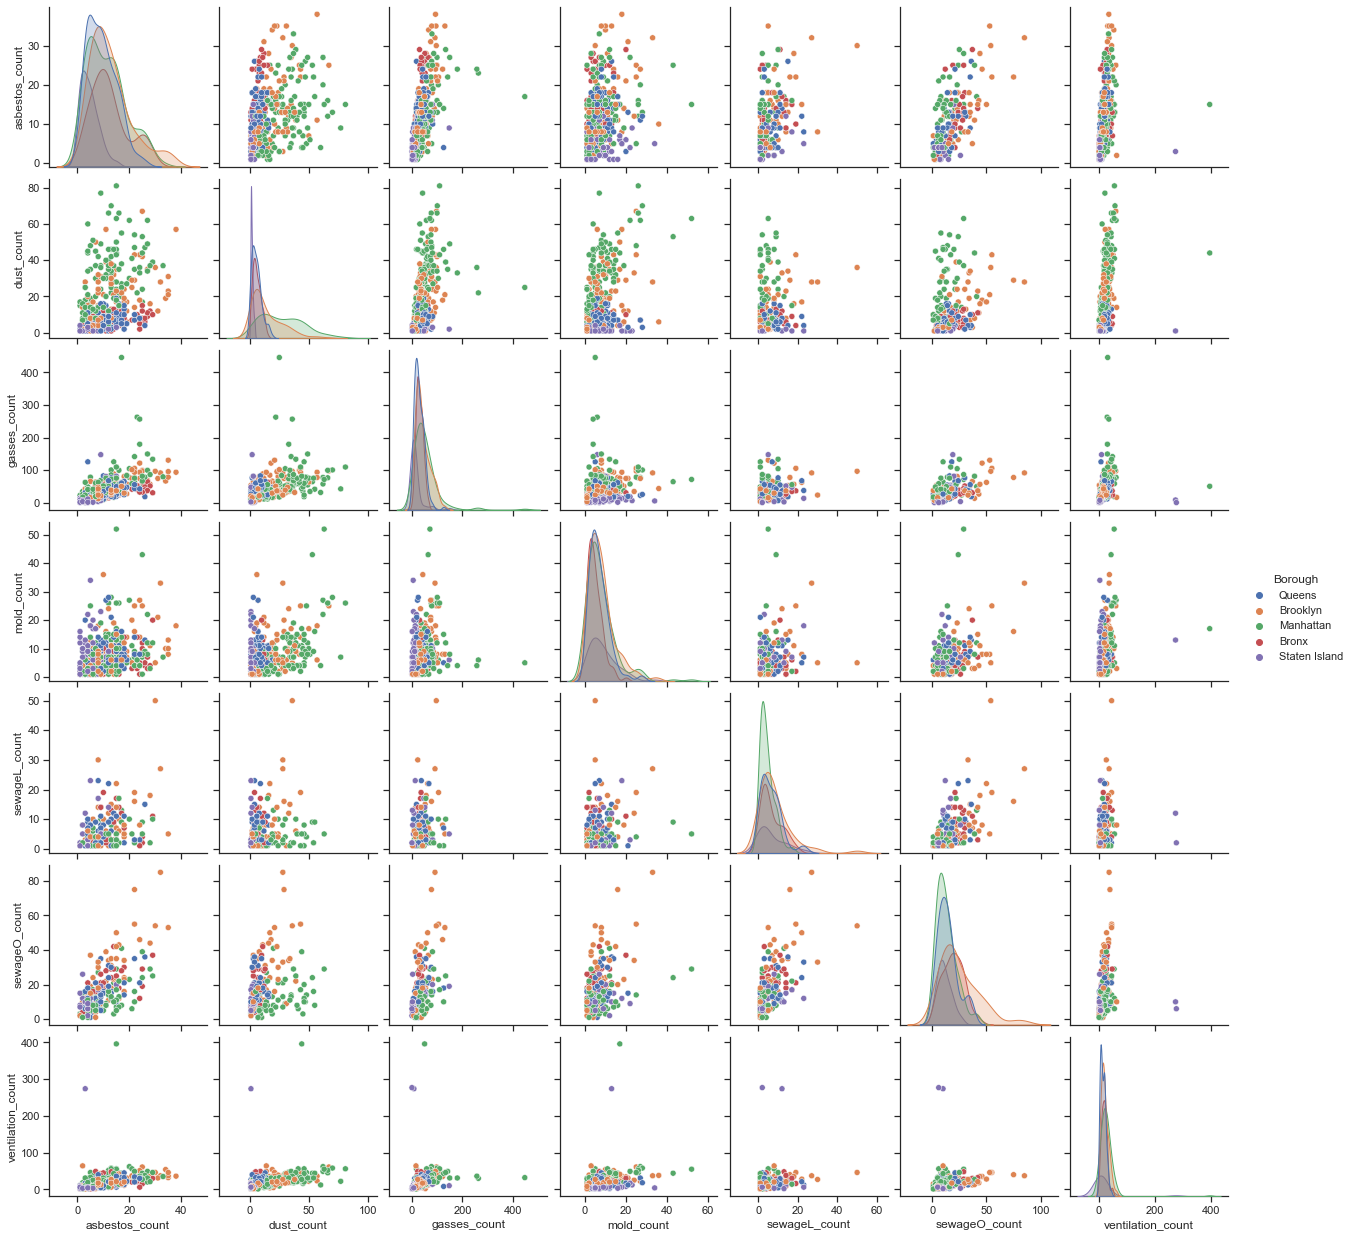

In [13]:
import seaborn as sns
sns.set_theme(style="ticks")

complaints_df_plot = sns.pairplot(complaints_df, hue="Borough")

In [15]:
complaints_df.corr()

,asbestos_count,dust_count,gasses_count,mold_count,sewageL_count,sewageO_count,ventilation_count
asbestos_count,1.000000,0.383247,0.561504,0.298778,0.343059,0.638397,0.310620
dust_count,0.383247,1.000000,0.488175,0.409105,0.132594,0.260371,0.356027
gasses_count,0.561504,0.488175,1.000000,0.209488,0.224407,0.504625,0.230660
mold_count,0.298778,0.409105,0.209488,1.000000,0.146870,0.371547,0.285383
sewageL_count,0.343059,0.132594,0.224407,0.146870,1.000000,0.563220,0.124416
sewageO_count,0.638397,0.260371,0.504625,0.371547,0.563220,1.000000,0.146378
ventilation_count,0.310620,0.356027,0.230660,0.285383,0.124416,0.146378,1.000000


[pandas.select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html "Documentation") Return a subset of the DataFrame’s columns based on the column dtypes.


[pandas.isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html "Documentation") Return a boolean same-sized object indicating if the values are NA




In [16]:
def continous_quality(frame):
    """
    Creates a dataframe containing data quality metrics
    for each float64 feature
    
    Arguments:
    `frame`: dataframe containing continous variables
    
    Outputs:
    `continous_df`: Dataframe containing count percent 
                    missing, cardinality, min, 1st quantile mean,
                    median, 3rd quantile, max, standard deviation
    """
    frame = frame.select_dtypes(include='float64')
    percent_missing = frame.isnull().sum() * 100 / len(frame)
    continous_df = pd.DataFrame({'Count': frame.count(),
                                'percent_missing': percent_missing,
                                'Card':  frame.nunique(),
                                'Min': frame.min(),
                                '1st Quartile': frame.quantile(.25),
                                'Mean': frame.mean(),
                                'Median':frame.median(),
                                '3rd Quartile':frame.quantile(.75),
                                'Max': frame.max(),
                                'Std Dev':frame.std()})
    continous_df.sort_values('percent_missing', inplace=True)
    return continous_df

In [17]:
continous_quality(complaints_df)

,Count,percent_missing,Card,Min,1st Quartile,Mean,Median,3rd Quartile,Max,Std Dev
gasses_count,517,0.957854,109,1.0,17.0,37.880077,30.0,50.00,446.0,35.256825
ventilation_count,515,1.340996,61,1.0,9.0,20.333981,17.0,26.00,396.0,26.142700
asbestos_count,508,2.681992,36,1.0,5.0,10.706693,9.0,15.00,38.0,7.255454
mold_count,479,8.237548,33,1.0,3.0,7.315240,6.0,9.00,52.0,6.469012
dust_count,475,9.003831,62,1.0,4.0,13.888421,7.0,19.00,81.0,15.353712
sewageO_count,212,59.386973,48,1.0,8.0,17.070755,15.0,21.25,85.0,12.889972
sewageL_count,195,62.643678,24,1.0,2.0,6.456410,5.0,9.00,50.0,6.314922


In [18]:
complaints_df = complaints_df.drop(['sewageO_count','sewageL_count'], axis=1)
complaints_df.head()

,UHF_42,Borough,Year,asbestos_count,dust_count,gasses_count,mold_count,ventilation_count
0,bayside - littleneck,Queens,2010,5.0,NaN,4.0,3.0,4.0
1,bayside - littleneck,Queens,2011,2.0,NaN,8.0,2.0,8.0
2,bayside - littleneck,Queens,2012,6.0,NaN,16.0,2.0,3.0
3,bayside - littleneck,Queens,2013,1.0,NaN,12.0,NaN,4.0
4,bayside - littleneck,Queens,2014,5.0,4.0,21.0,NaN,NaN


[Counter()](https://docs.python.org/3/library/collections.html#collections.Counter "Documentation") A collection where elements are stored as dictionary keys and their counts are stored as dictionary values.

[most_common()](https://docs.python.org/3/library/collections.html#collections.Counter.most_common "Documentation") Return a list of the n most common elements and their counts from the most common to the least.

In [19]:
from collections import Counter
data = Counter(complaints_df['UHF_42'])
data.most_common()

[('downtown - heights - slope', 14),
 ('coney island - sheepshead bay', 13),
 ('high bridge - morrisania', 13),
 ('kingsbridge - riverdale', 13),
 ('west queens', 13),
 ('bayside - littleneck', 12),
 ('bedford stuyvesant - crown heights', 12),
 ('bensonhurst - bay ridge', 12),
 ('borough park', 12),
 ('canarsie - flatlands', 12),
 ('central harlem - morningside heights', 12),
 ('chelsea - clinton', 12),
 ('crotona -tremont', 12),
 ('east flatbush - flatbush', 12),
 ('east harlem', 12),
 ('east new york', 12),
 ('flushing - clearview', 12),
 ('fordham - bronx pk', 12),
 ('fresh meadows', 12),
 ('gramercy park - murray hill', 12),
 ('greenpoint', 12),
 ('greenwich village - soho', 12),
 ('hunts point - mott haven', 12),
 ('jamaica', 12),
 ('long island city - astoria', 12),
 ('lower east side', 12),
 ('lower manhattan', 12),
 ('northeast bronx', 12),
 ('pelham - throgs neck', 12),
 ('port richmond', 12),
 ('ridgewood -forest hills', 12),
 ('rockaway', 12),
 ('south beach - tottenville', 

[List Comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp "Documentation") List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list.

[numpy.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html "Documentation") Returns the sorted unique elements of an array.

[Series.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html "Documentation") Map values of Series according to an input mapping or function.


In [20]:

def categorical_quality(frame):
    """
    Creates a dataframe containing data quality metrics
    for each object and int64 feature
    
    Arguments:
    `frame`: dataframe containing categorical variables
    
    Outputs:
    `categorical_df`:Dataframe containing percent missing, cardinality,
                    mode of each feature, count of the Mode, percent of
                    the mode compared to all values, 2nd Mode, percent
                    of the 2nd Mode.
    """

    cat_frame = frame.select_dtypes(exclude='float64', include=['int64', 'object'])
    percent_missing = cat_frame.isnull().sum() * 100 / len(cat_frame)
    categorical_df = pd.DataFrame({ 'percent_missing': percent_missing,
                                    'Card':  cat_frame.nunique(),
                                    'Mode': [Counter(complaints_df[c]).most_common(len(np.unique(complaints_df[c])))\
                                    [0][0] for c in list(cat_frame.columns)],
                                    'Mode Freq.': [Counter(complaints_df[c]).most_common(len(np.unique(complaints_df[c])))\
                                    [0][1] for c in list(cat_frame.columns)],
                                    'Mode %': [Counter(complaints_df[c]).most_common(len(np.unique(complaints_df[c])))\
                                    [0][1] for c in list(cat_frame.columns)],
                                    '2nd Mode': [Counter(complaints_df[c]).most_common(len(np.unique(complaints_df[c])))\
                                    [1][0] for c in list(cat_frame.columns)],
                                    '2nd Mode %':  [Counter(complaints_df[c]).most_common(len(np.unique(complaints_df[c])))\
                                    [1][1] for c in list(cat_frame.columns)]
                                 })
    categorical_df['Mode %'] = categorical_df['Mode %'].div(522) * 100
    categorical_df['Mode %'] = categorical_df['Mode %'].map('{:,.2f}'.format)
    categorical_df['2nd Mode %'] = categorical_df['2nd Mode %'].div(522) * 100
    categorical_df['2nd Mode %'] = categorical_df['2nd Mode %'].map('{:,.2f}'.format)
    categorical_df.sort_values('percent_missing', inplace=True)

    return categorical_df


In [21]:
categorical_quality(complaints_df)

,percent_missing,Card,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode %
UHF_42,0.0,43,downtown - heights - slope,14,2.68,coney island - sheepshead bay,2.49
Borough,0.0,5,Manhattan,136,26.05,Brooklyn,25.29
Year,0.0,12,2021,45,8.62,2011,8.43


## Transformations
---

### Logarithmic Transformation

[numpy.logs()](https://numpy.org/doc/stable/reference/generated/numpy.log.html "Documentation") Natural logarithm, element-wise.

[pandas.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html "Documentation") Concatenate pandas objects along a particular axis with optional set logic along the other axes.

In [22]:
def logTransformation(df):
    """ 
    The function creates a dataframe with every
    float64 features logged

    Arguments:
    `df`: dataframe with float64 variables
    
    Outputs:
    `result`: returns a dataframe with the log of all float64 values
    """
    df_copy = df.copy()
    logCounts = np.log(df_copy.select_dtypes(include='float64'))
    labels = df_copy.select_dtypes(include=['object'], exclude='int64')
    result = pd.concat([labels, logCounts.reindex(labels.index)], axis=1)
    return result

In [23]:
logTransformation(complaints_df).head()

,UHF_42,Borough,Year,asbestos_count,dust_count,gasses_count,mold_count,ventilation_count
0,bayside - littleneck,Queens,2010,1.609438,NaN,1.386294,1.098612,1.386294
1,bayside - littleneck,Queens,2011,0.693147,NaN,2.079442,0.693147,2.079442
2,bayside - littleneck,Queens,2012,1.791759,NaN,2.772589,0.693147,1.098612
3,bayside - littleneck,Queens,2013,0.000000,NaN,2.484907,NaN,1.386294
4,bayside - littleneck,Queens,2014,1.609438,1.386294,3.044522,NaN,NaN


### Square Root Transformation

[concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html"Documentation") Concatenate pandas objects along a particular axis with optional set logic along the other axes.

In [24]:
def sqrtTransformation(df):
    """ 
    The function creates a dataframe with every
    float64 features squared

    Arguments:
    `df`: dataframe with float64 variables
    
    Outputs:
    `result`: returns a dataframe with all float64 values squared
    """
    df_copy = df.copy()
    sqrtCounts = df_copy.select_dtypes(include='float64')**.5
    labels = df_copy.select_dtypes(include=['object'], exclude='int64')
    result = pd.concat([labels, sqrtCounts.reindex(labels.index)], axis=1)
    return result
    

In [25]:
sqrtTransformation(complaints_df).head()

,UHF_42,Borough,Year,asbestos_count,dust_count,gasses_count,mold_count,ventilation_count
0,bayside - littleneck,Queens,2010,2.236068,NaN,2.000000,1.732051,2.000000
1,bayside - littleneck,Queens,2011,1.414214,NaN,2.828427,1.414214,2.828427
2,bayside - littleneck,Queens,2012,2.449490,NaN,4.000000,1.414214,1.732051
3,bayside - littleneck,Queens,2013,1.000000,NaN,3.464102,NaN,2.000000
4,bayside - littleneck,Queens,2014,2.236068,2.0,4.582576,NaN,NaN


### Standardization

[zip()](https://www.programiz.com/python-programming/methods/built-in/zip "Documentation") The function takes iterables (can be zero or more), aggregates them in a tuple, and returns it

In [26]:
def standardization(df):
    """ 
    Standardization of numeric fields, where all values will have mean of zero 
    and standard deviation of one. (z-score)

    Arguments:
    `dataset`: A Dataframe
    
    Outputs:
    `data`: returns a dataframe with all the float64 values standandized
    """
    df_copy = df.copy()
    dtypes = list(zip(df_copy.dtypes.index, map(str, df_copy.dtypes)))
    # Normalize numeric columns.
    for column, dtype in dtypes:
        if dtype == 'float64':
            df_copy[column] -= df_copy[column].mean()
            df_copy[column] /= df_copy[column].std()
    result = df_copy
    return result

In [27]:
standardization(complaints_df).head()

,UHF_42,Borough,Year,asbestos_count,dust_count,gasses_count,mold_count,ventilation_count
0,bayside - littleneck,Queens,2010,-0.786538,NaN,-0.960951,-0.667063,-0.624801
1,bayside - littleneck,Queens,2011,-1.200020,NaN,-0.847498,-0.821646,-0.471794
2,bayside - littleneck,Queens,2012,-0.648711,NaN,-0.620591,-0.821646,-0.663052
3,bayside - littleneck,Queens,2013,-1.337848,NaN,-0.734044,NaN,-0.624801
4,bayside - littleneck,Queens,2014,-0.786538,-0.644041,-0.478775,NaN,NaN


### Clamp Transformation
***
Based on the outlier of your data you can use a bell
 curve to inform your percentile cut offs
***


<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/PR_and_NCE.gif" style="width:800px;height:400px"/>

In [112]:
# Based on the outlier of your data you can use a bell
# curve to inform your percentile cut cut offs 
def clampTransformation(df):
    """ 
    Set values over an upper quantile (.94) threshold
    and lower quantile (.03) threshold  to a random value
    within the 34th and 68th quantile

    Arguments:
    `dataset`: A Dataframe
    
    Outputs:
    `data`: returns a dataframe with the float64 outlier
            values set to random values with 1 standard
            deviation from the mean
    """
    
    result = df.copy()
    for c in list(df.columns):
        if df[c].dtype == 'float64':
            result[c] = result[c].apply(lambda x:  np.random.randint\
                        (result[c].quantile(0.34), result[c].quantile(0.68))
                        if x > result[c].quantile(.94) 
                        or x < result[c].quantile(.03) else x )
    return result

In [115]:
clampTransformation(complaints_df).head()

,UHF_42,Borough,Year,asbestos_count,dust_count,gasses_count,mold_count,ventilation_count
0,bayside - littleneck,Queens,2010,5.0,NaN,4.0,3.0,4.0
1,bayside - littleneck,Queens,2011,2.0,NaN,8.0,2.0,8.0
2,bayside - littleneck,Queens,2012,6.0,NaN,16.0,2.0,3.0
3,bayside - littleneck,Queens,2013,1.0,NaN,12.0,NaN,4.0
4,bayside - littleneck,Queens,2014,5.0,4.0,21.0,NaN,NaN


### QQ-Plot and Histogram to check Normalization

In [28]:
from scipy import stats
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


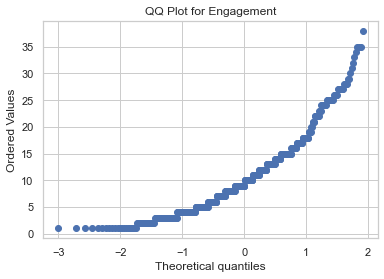

In [125]:
stats.probplot(x=complaints_df['asbestos_count'], dist="norm", plot=plt)
plt.title("QQ Plot for Engagement")
plt.show()

Text(3.0, 71.6625, '3.00 (median)')

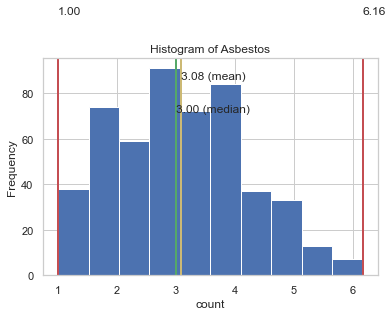

In [161]:
# try sqrTransformation and logTransformation
vari_count = complaints_df['asbestos_count']
count_graph = vari_count.plot.hist()
count_graph.set_title('Histogram of Asbestos')
count_graph.set_xlabel('count')
plt.plot()
plt.axvline(vari_count.mean(), color='y', linestyle='solid', linewidth=2)
plt.axvline(vari_count.min(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_count.max(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_count.median(), color='g', linestyle='solid', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(vari_count.mean(), max_ylim*0.9, '{:.2f} (mean)'.format(vari_count.mean()))
plt.text(vari_count.max(), max_ylim*1.2, '{:.2f}'.format(vari_count.max()))
plt.text(vari_count.min(), max_ylim*1.2, '{:.2f}'.format(vari_count.min()))
plt.text(vari_count.median(), max_ylim*0.75, '{:.2f} (median)'.format(vari_count.median()))

### Box and whisker analysis
***
The box plot shape will show if a statistical data set is normally
distributed or skewed. When the median is in the middle of the box, and the 
whiskers are about the same on both sides of the box, then the distribution is symmetric.
***
[Box and Whisker](https://www.simplypsychology.org/boxplots.html#:~:text=The%20box%20plot%20shape%20will,then%20the%20distribution%20is%20symmetric."Documentation") 

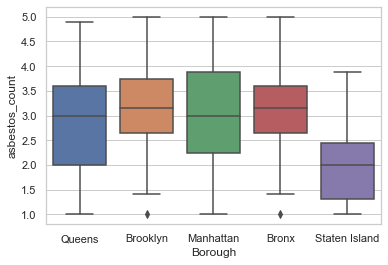

In [127]:
# Try the clamp then square root transformation
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x ='Borough',y ='asbestos_count', data=sqrtTransformation(clampTransformation(complaints_df)))

## Imputation
---

### Mean, Median, Mode, and Random Imputation

In [32]:
def meanImputation(data):
    """ 
    Fills in NaN values with the mean of the column
    
    Arguments:
    `data`: dataframe with numerical features
    
    Outputs:
    `result`: return data of the original dataframe
              with all NaNs replaced with the feature
              column mean
    """
    column_means = data.mean()
    result = data.fillna(column_means)
    return result

In [33]:
def medianImputation(data):
    """ 
    Fills in NaN values with the median of the column
    
    Arguments:
    `data`: dataframe with numerical features
    
    Outputs:
    `result`: return data of the original dataframe
              with all NaNs replaced with the feature
              column median
    """ 
    column_medians = data.median()
    return data.fillna(column_medians)

In [34]:
#Mode imputation is typically for categorical variables
def modeImputation(data):
    """ 
    Fills in NaN values with the mode of the column
    
    Arguments:
    `data`: dataframe with numerical features
    
    Outputs:
    `result`: return data of the original dataframe
              with all NaNs replaced with the feature
              column mode
    """
    column_modes = data.mode()
    return data.fillna(column_modes)

In [128]:
def randImputation(df):
    """ 
    Fills in NaN values with the random integers of the column
    
    Arguments:
    `data`: dataframe with numerical features
    
    Outputs:
    `result`: return data of the original dataframe
              with all NaNs replaced with the feature
              column random values
    """
    result = df.copy()
    for c in list(df.columns):
        if df[c].dtype == 'float64':
            result[c] = result[c].fillna(value=np.random.randint
            (complaints_df[c].quantile(0.34), complaints_df[c].quantile(0.68)))
    return result

### Interpolation

In [ ]:
#‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’
# some of the parameters may need the argument "order="
continous_quality(complaints_df.interpolate(method='linear'))
#complaints_df.interpolate(method='linear')

In [ ]:
# bfill, ffill
continous_quality(complaints_df.fillna(method='ffill'))
#complaints_df.fillna(method='ffill').head(10)

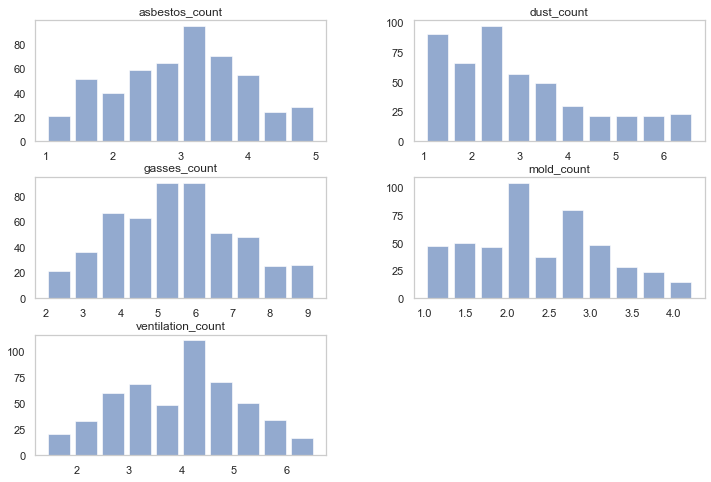

In [150]:
sqrtTransformation((clampTransformation(complaints_df)))\
.hist(column=['asbestos_count',
              'dust_count',
              'gasses_count',
              'mold_count',
              'ventilation_count'],
bins=10, figsize=(12, 8), alpha=0.6, grid=False, rwidth=0.8)
plt.show()

### Additional Functions

[Dataframe.std()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html "Documentation") Return sample standard deviation over requested axis.

[Dataframe.min()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html "Documentation") Return the minimum of the values over the requested axis.

[Dataframe.mean()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html "Documentation") Return the mean of the values over the requested axis.

[Dataframe.div()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html "Documentation") Get Floating division of dataframe and other, element-wise.